In [2]:
using Plots

In [27]:
function euler_method(df::Function,
                      x0::Float64, 
                      y0::Float64,
                      a::Float64,
                      b::Float64,
                      n::Int64)::Tuple{Array{Float64,1},Array{Float64,1}}
    
    """
    This function solves the initial value problem
    y' = f(x,y), y(x0) = y0
    using the Euler method.

    Input:
    ------------------
        - df: the function derivative y', from which we want to get f(x,y)
        - x0: the initial x value
        - y0: the initial y value
        - a: the left endpoint of the interval
        - b: the right endpoint of the interval
        - n: the number of subintervals

    Output:
    ------------------
        - x: the x values of the solution
        - y: the y values of the solution
    """
    
    epsilon = (b-a)/n
    
    # Initialize the solution vector
    y = zeros(n+1)
    y[1] = y0

    # Initialize the x vector
    x = zeros(n+1)
    x[1] = x0

    for i in 1:n
        y[i+1] = y[i] + epsilon*df(x[i], y[i])
        x[i+1] = i*epsilon + x0
    end

    return x, y
end

euler_method (generic function with 2 methods)

In [54]:
function error_theorethical_upper_bound(L::Float64, M::Float64, epsilon::Float64, x::Array{Float64,1}, a::Float64)::Array{Float64,1}

    cte = (epsilon*M)/(L*2)
    upper_threshold = [cte*(exp(L*(xi - a) - 1)) for xi in x]

    return upper_threshold
end

error_theorethical_upper_bound (generic function with 1 method)

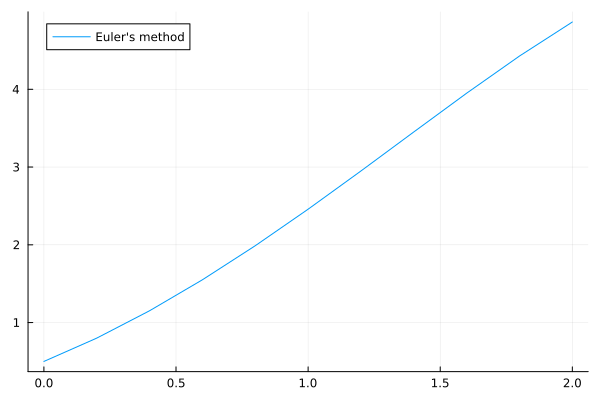

In [46]:
dfy = (x, y) -> y - x^2 + 1
y_exact = (x) -> (x+1)^2 - 0.5*exp(x)

x0 = 0.0
y0 = 0.5
n = 10
a = 0.0
b = 2.0

x, y = euler_method(dfy, x0, y0, a, b, n)
plot(x, y, label="Euler's method")

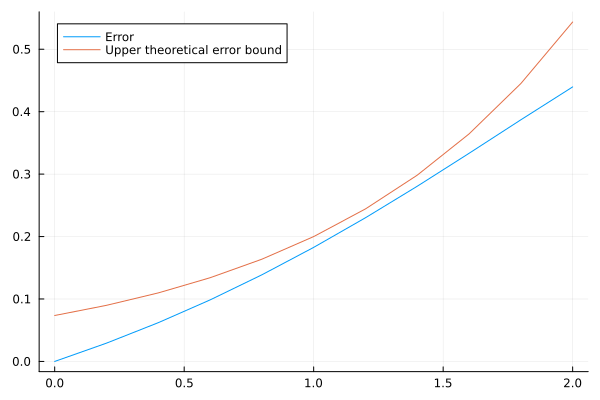

In [62]:
L = 1.0
M = 2.0
epsilon = (b-a)/n

errors = abs.(y_exact.(x) - y)
upper_theoretical_bound = error_theorethical_upper_bound(L, M, epsilon, x, a)

plot(x, errors, label="Error")
plot!(x, upper_theoretical_bound, label="Upper theoretical error bound")


In [63]:

function taylor_superior_order_method(df::Function,
                                      numeric_diff_algorithm::Function, 
                                      ord::Int64,
                                      x0::Float64, 
                                      y0::Float64,
                                      a::Float64,
                                      b::Float64,
                                      n::Int64)::Tuple{Array{Float64,1},Array{Float64,1}}
    """
        This function solves the initial value problem
        y' = f(x,y), y(x0) = y0

        Input:
        --------------------
        - df: The function derivative y', from which we want to get f(x,y)
        - numeric_diff_algorithm: The numeric differentiation algorithm
        - ord: The order of the numeric differentiation algorithm. How many times we want to differentiate.
        - x0: The initial x value
        - y0: The initial y value
        - a: The left endpoint of the interval
        - b: The right endpoint of the interval
        - n: The number of subintervals
    
        Output:
        --------------------
        - x: The x values of the solution
        - y: The y values of the solution
    """

    #seems like we won't implement something like this, at least for now
    #so now the focus shifts to this same function but passing the next 
    #derivatives as parameters
    return [], []
end

taylor_superior_order_method (generic function with 1 method)

In [ ]:
function taylor_superior_order_method(dfs::Array{Function,1},
                                      x0::Float64, 
                                      y0::Float64,
                                      a::Float64,
                                      b::Float64,
                                      n::Int64)::Tuple{Array{Float64,1},Array{Float64,1}}
    """
        This function solves the initial value problem
        y' = f(x,y), y(x0) = y0

        Input:
        --------------------
        - df: The function derivatives y', y'', ..., from which we want to get f(x,y)
        - x0: The initial x value
        - y0: The initial y value
        - a: The left endpoint of the interval
        - b: The right endpoint of the interval
        - n: The number of subintervals
    
        Output:
        --------------------
        - x: The x values of the solution
        - y: The y values of the solution
    """

    epsilon = (b-a)/n
    
    # Initialize the solution vector
    y = zeros(n+1)
    y[1] = y0

    # Initialize the x vector
    x = zeros(n+1)
    x[1] = x0

    for i in 1:n
        change = 0.0

        for j in 1:length(dfs)
            function_to_evaluate = dfs[j]
            change += (epsilon^j)/factorial(j)*function_to_evaluate(x[i], y[i])
        end

        y[i+1] = y[i] + change
        x[i+1] = i*epsilon + x0
    end

    return x, y
end

In [66]:
y′ = (x, y) -> y - x^2 + 1
y′′ = (x, y) -> y - 2x 


#89 (generic function with 1 method)